In [1]:
# COVID2019

In [52]:
import pandas as pd
from pathlib import Path



def get_data(file):

    # COVID-19 contains data pulled from https://github.com/CSSEGISandData/COVID-19
    _dir = Path(r"..\COVID-19\csse_covid_19_data\csse_covid_19_time_series")
    
    df = pd.read_csv(_dir / file)
    df.drop(['Lat', 'Long'], inplace=True, axis=1)
    df.set_index(['Province/State', 'Country/Region'], inplace=True)
    df = df.T
    return df

df_confirmed_raw = get_data("time_series_covid19_confirmed_global.csv")
df_deaths_raw = get_data("time_series_covid19_deaths_global.csv")


In [58]:
import matplotlib.pyplot as plt



def prepro(country2states, df, info):

    idx = pd.IndexSlice
    
    data = dict()
    diff_data = dict()

    for country in country2states:
        states = country2states[country]
        for state in states:
            _id = f"{country} {state if not pd.isnull(state) else ''}".strip()

            n = pd.Series(df.loc[:,idx[state, country]])
            d = n.diff()
            data[_id] = n
            diff_data[_id] = d
    
    df_diff = pd.DataFrame(data=diff_data)
    df = pd.DataFrame(data=data)

    return df, df_diff
    
    
def plot_confirmed_plus_deaths(df_confirmed, df_deaths, info, start_date=None):
    
    def _plot(df, start_date, info):
        labels = list()

        if start_date:
            mask = (df.index > start_date)
            df = df.loc[mask]
            
        for state in df.columns:
            plt.plot(df.index, df[state])
            labels.append(f"{state}")

        plt.legend(labels=labels)

    plt.figure(figsize=(20,10))
    ax = plt.subplot(2,1,1)
    _plot(df_confirmed, start_date, 'confirmed')
    ax = plt.subplot(2,1,2)
    _plot(df_deaths, start_date, 'deaths')


    
    
    plt.title(f"Confirmed vs deaths {info}")
    plt.xlabel('date')
    


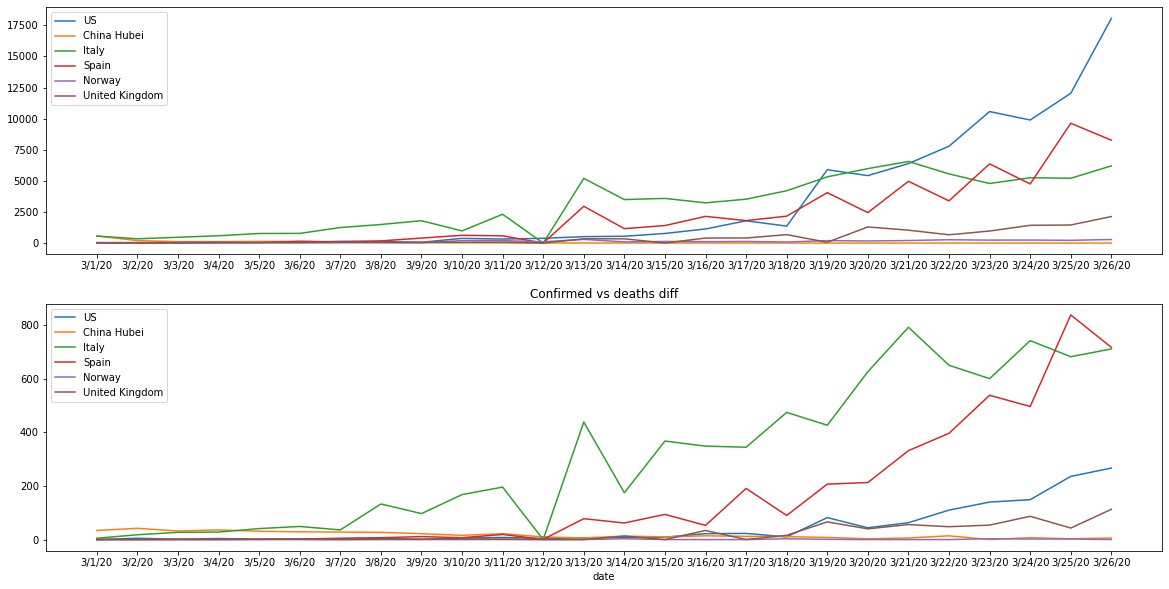

In [61]:
country2states = {'US': [None], 'China': ['Hubei'], 'Italy': [None], 'Spain': [None], 'Norway': [None], 'United Kingdom': [None]}

df_confirmed, df_confirmed_diff = prepro(country2states, df_confirmed_raw, 'confirmed')
df_deaths, df_deaths_diff = prepro(country2states, df_deaths_raw, 'deaths')

plot_confirmed_plus_deaths(df_confirmed_diff, df_deaths_diff, "diff", "2020-03-01")

In [19]:
df_confirmed_deaths.tail()

,index,US None,China Hubei,Italy None,Spain None
3/22/20,3/22/20,417,3153,5476,1772
3/23/20,3/23/20,557,3153,6077,2311
3/24/20,3/24/20,706,3160,6820,2808
3/25/20,3/25/20,942,3163,7503,3647
3/26/20,3/26/20,1209,3169,8215,4365
